In [2]:
#the essentials for deep_learning
import numpy as np
import tensorflow as tf

#going to need later to create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, MaxPooling2D, MaxPooling3D

#going to use keras datasets for easy access to the CIFAR-10 datasets
from tensorflow.keras import datasets

#for visualizing of results, specifically validation accuracy
from matplotlib import pyplot as plt

In [7]:
"""
loading in the cifar10 dataset from keras.datasets, and splitting it into 
training images, training labels, validation images and validation labels
""" 
(train_images, train_labels), (val_images, val_labels) = datasets.cifar10.load_data()
"""
Normalizing pixel values in the images to be between 0 and 1 which will help
speed up model learning
"""
train_images, val_images = train_images / 255.0, val_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:

#making the model

model = Sequential()

"""
for the first nine layers I have a series of:
A convolution layer of 16,32,64 filters respectively, each with a 3by3 kernel
 - I chose a 3 by 3 kernel because it seemed like a general theme in google
 - I chose LeakyRelu instead of Relu so I could deal with the dying ReLU problem
A dropout layer to prevent overfitting and keep the CNN on it's toes
Finally a max pooling layer to reduce computational cost
"""
model.add(Conv2D(16, (3,3),activation =LeakyReLU(0.2), input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3),activation =LeakyReLU(0.2)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3),activation =LeakyReLU(0.2)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

"""
For the next two layers I:
Flattened and passed to a fully connected layer
The dense layer which had an activation function of leakyReLU
Another dropout layer to prevent overfitting
Finally the classification layer with 10 nuerons (for 10 classes in cifar10)
 - Used softmax as activation so it would give me probabilities for each class label

"""

model.add(Flatten())
model.add(Dense(256, activation =LeakyReLU(0.2)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

In [8]:
"""
Used sparse_categorical crossentrophy for the loss function because I needed
a probabilistic loss function and my options were categorical, binary, or
sparse_categorical. I ruled out binary because there were more than two classes,
and since the cifar dataset comes with integer labels, sparse_categorical makes 
more sense.


I used ada as my optimizer, while I believe I should have SGD instead, because 
adam performs well on the training set, but generalizes worse
then SGD on the testing set, however adam is faster and it has an adaptive 
learning rate, so that's what I'm going to be using
"""

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', \
              metrics = ['accuracy'])


In [11]:
#setting up the callback directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [13]:
"""
actually training the model, passing in the training_set and the validation set,
also letting it go for 20 epochs, because that is what many of the tuturials 
recommended, also used the callbacks feature to specifically a callback directory
so I can go back to the model at different points in it's training
"""
hist = model.fit(train_images, train_labels, epochs=20, \
                 validation_data=(val_images, val_labels), \
                 callbacks=[tensorboard_callback])



Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7293 - accuracy: 0.7411 - val_loss: 0.9697 - val_accuracy: 0.6771
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7191 - accuracy: 0.7469 - val_loss: 0.8126 - val_accuracy: 0.7221
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7055 - accuracy: 0.7527 - val_loss: 0.8653 - val_accuracy: 0.7047
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6993 - accuracy: 0.7529 - val_loss: 0.8969 - val_accuracy: 0.6988
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6909 - accuracy: 0.7574 - val_loss: 0.8939 - val_accuracy: 0.7035
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6879 - accuracy: 0.7575 - val_loss: 0.9326 - val_accuracy: 0.6903
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6762 - accuracy: 0.7627 - val_loss: 0.9864 - val_accurac

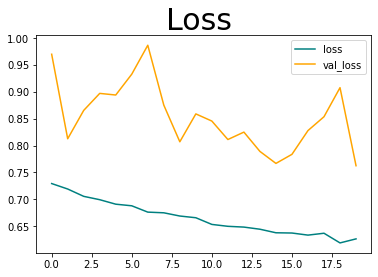

In [14]:
#using pyplot to plot out the loss and validation loss
plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.suptitle('Loss', fontsize = 30)
plt.legend(loc='upper right')
plt.show()

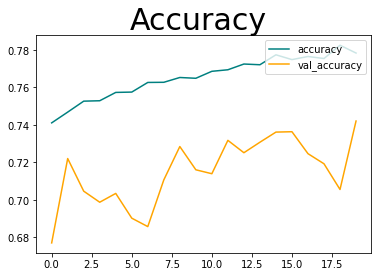

In [15]:
# using pyplot to plot out the accuracy and validation accuracy
plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
plt.suptitle('Accuracy', fontsize = 30)
plt.legend(loc='upper right')
plt.show()